In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gplay = pd.read_csv("gplay.csv",index_col=0)

In [4]:
gplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [5]:
gplay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10841 entries, 0 to 10840
Data columns (total 9 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
dtypes: float64(1), object(8)
memory usage: 847.0+ KB


### Missing Values

In [6]:
gplay.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
dtype: int64

In [122]:
gplay["Rating"].fillna(gplay["Rating"].mean(),inplace=True)

In [123]:
gplay.dropna(subset = ["Type","Content Rating"],inplace=True)

In [61]:
gplay.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

### Other than missing values if any

In [70]:
#for data in gplay["Price"]:
   # if not(str(data).isnumeric()):
      #  print(data,end="")

### Outliers

In [75]:
#for val in gplay["Price"]:
    print(str(val)[1:],end="")

In [124]:
def clean_price(x):
    return (str(x)[1:])

In [125]:
gplay["Price"] = gplay["Price"].map(clean_price)
gplay["Price"].unique()

array(['', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '1.00', '29.99', '12.99',
       '2.49', '10.99', '1.50', '19.99', '15.99', '33.99', '74.99',
       '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88', '25.99',
       '399.99', '17.99', '400.00', '3.02', '1.76', '4.84', '4.77',
       '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99', '299.99',
       '379.99', '37.99', '18.99', '389.99', '19.90', '8.49', '1.75',
       '14.00', '4.85', '46.99', '109.99', '154.99', '3.08', '2.59',
       '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04', '4.29',
       '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97', '200.00',
       '89.99', '2.56', '30.99', '3.61', '394.99', '1.26', '1.20', '1.04'],
      dtype=object)

In [126]:
gplay["Price"] = pd.to_numeric(gplay["Price"],errors='coerce')
gplay["Reviews"] = pd.to_numeric(gplay['Reviews'],errors='coerce')

In [92]:
gplay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 9 columns):
App               10839 non-null object
Category          10839 non-null object
Rating            10839 non-null float64
Reviews           10839 non-null int64
Size              10839 non-null object
Installs          10839 non-null object
Type              10839 non-null object
Price             800 non-null float64
Content Rating    10839 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 846.8+ KB


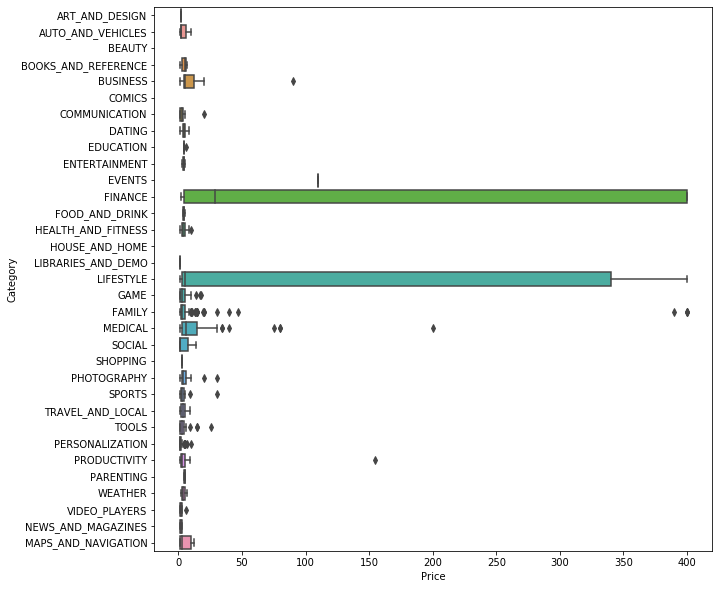

In [36]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Price",y="Category",data=gplay)
plt.show()

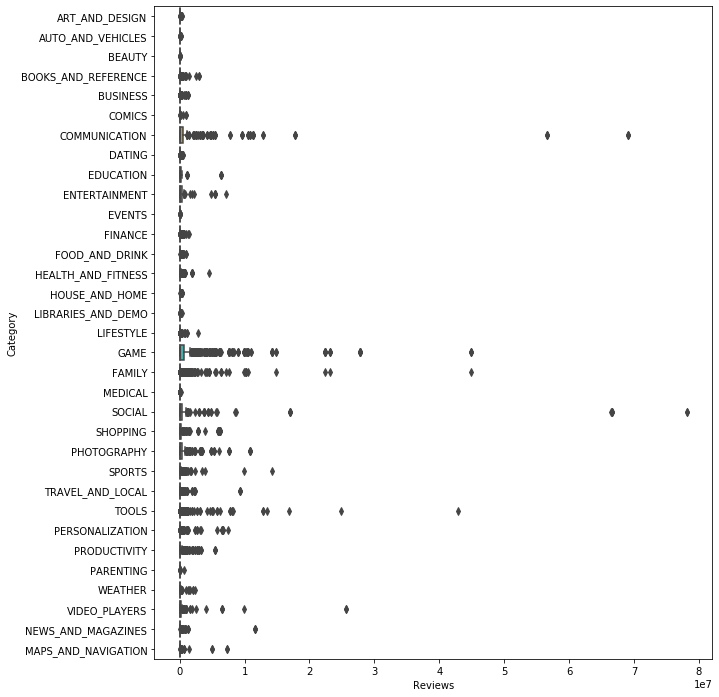

In [34]:
plt.figure(figsize=(10,12))
sns.boxplot(x="Reviews",y="Category",data=gplay)
plt.show()

### Handling Categorical and Numerical data

In [127]:
gplay_cat = gplay.select_dtypes("object")

In [128]:
gplay_num = gplay.select_dtypes(["float64","int64"])

In [129]:
gplay_cat.head()

,App,Category,Size,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,19M,"10,000+",Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,14M,"500,000+",Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,8.7M,"5,000,000+",Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,25M,"50,000,000+",Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,2.8M,"100,000+",Free,Everyone


In [130]:
gplay_num.head()

,Rating,Reviews,Price
0,4.1,159,NaN
1,3.9,967,NaN
2,4.7,87510,NaN
3,4.5,215644,NaN
4,4.3,967,NaN


In [131]:
gplay_num["Price"].fillna(gplay_num["Price"].mean(),inplace=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [132]:
gplay_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 3 columns):
Rating     10839 non-null float64
Reviews    10839 non-null int64
Price      10839 non-null float64
dtypes: float64(2), int64(1)
memory usage: 338.7 KB


In [133]:
gplay_num.head()

,Rating,Reviews,Price
0,4.1,159,13.920837
1,3.9,967,13.920837
2,4.7,87510,13.920837
3,4.5,215644,13.920837
4,4.3,967,13.920837


In [ ]:
# Label encoding

In [134]:
from sklearn.preprocessing import LabelEncoder

In [135]:
for col in gplay_cat:
    le = LabelEncoder()
    gplay_cat[col] = le.fit_transform(gplay_cat[col])

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [136]:
gplay_cat.head()

,App,Category,Size,Installs,Type,Content Rating
0,6961,0,53,6,0,1
1,2632,0,27,18,0,1
2,8655,0,366,13,0,1
3,7826,0,99,16,0,4
4,7021,0,62,9,0,1


## skewness

In [137]:
gplay_num.head()

,Rating,Reviews,Price
0,4.1,159,13.920837
1,3.9,967,13.920837
2,4.7,87510,13.920837
3,4.5,215644,13.920837
4,4.3,967,13.920837


In [138]:
from scipy.stats import skew

Column:  Rating
Skewness:  -1.9908611349381038


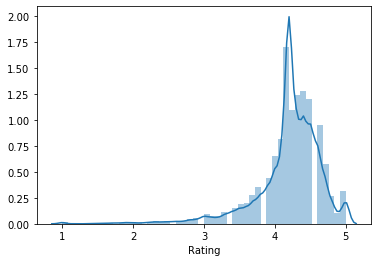

Column:  Reviews
Skewness:  16.446560075678022


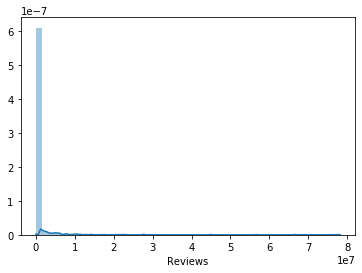

Column:  Price
Skewness:  23.14997488255014


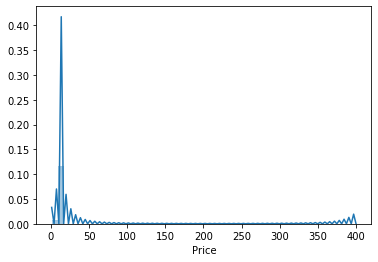

In [139]:
for col in gplay_num:
    print("Column: ",col)
    print("Skewness: ",skew(gplay_num[col]))
    
    plt.figure(figsize=(6,4))
    sns.distplot(gplay_num[col])
    plt.show()

In [140]:
gplay_num.corr()

,Rating,Reviews,Price
Rating,1.000000,0.067950,-0.029101
Reviews,0.067950,1.000000,-0.000156
Price,-0.029101,-0.000156,1.000000


In [141]:
gplay_num["Reviews"] = np.sqrt(gplay_num["Reviews"])

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [142]:
skew(gplay_num["Reviews"])

5.68650762661163

In [143]:
# Join both dataframe  

In [146]:
gplay_new = pd.concat([gplay_num,gplay_cat],axis=1)

In [147]:
gplay_new.head()

,Rating,Reviews,Price,App,Category,Size,Installs,Type,Content Rating
0,4.1,12.609520,13.920837,6961,0,53,6,0,1
1,3.9,31.096624,13.920837,2632,0,27,18,0,1
2,4.7,295.820892,13.920837,8655,0,366,13,0,1
3,4.5,464.374849,13.920837,7826,0,99,16,0,4
4,4.3,31.096624,13.920837,7021,0,62,9,0,1


In [ ]:
## More Preprocessing
### - Scaling
### - Feature Engineering

In [150]:
X = gplay_new.drop("Rating",axis=1)
y = gplay_new["Rating"]

In [151]:
X.head()

,Reviews,Price,App,Category,Size,Installs,Type,Content Rating
0,12.609520,13.920837,6961,0,53,6,0,1
1,31.096624,13.920837,2632,0,27,18,0,1
2,295.820892,13.920837,8655,0,366,13,0,1
3,464.374849,13.920837,7826,0,99,16,0,4
4,31.096624,13.920837,7021,0,62,9,0,1


In [152]:
y.head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

## Standard Scaling

In [153]:
from sklearn.preprocessing import StandardScaler

In [155]:
for col in X:
    ss = StandardScaler()
    X[col] = ss.fit_transform(X[[col]])

In [156]:
X.head()

,Reviews,Price,App,Category,Size,Installs,Type,Content Rating
0,-0.404581,-9.151255e-16,0.741022,-2.002351,-0.988724,-0.515540,-0.282293,-0.462151
1,-0.374440,-9.151255e-16,-0.815556,-2.002351,-1.155918,1.971856,-0.282293,-0.462151
2,0.057164,-9.151255e-16,1.350134,-2.002351,1.024028,0.935441,-0.282293,-0.462151
3,0.331973,-9.151255e-16,1.052051,-2.002351,-0.692920,1.557290,-0.282293,2.519548
4,-0.374440,-9.151255e-16,0.762597,-2.002351,-0.930849,0.106309,-0.282293,-0.462151


In [157]:
## Feature Engineering can do Later-on